In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


In [3]:
airbnb = pd.read_csv("new_york_airbnb.csv.csv")
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [1]:
# Descriptive Analysis
# As first, I will perform some descriptive analysis to get a picture of the data, keeping
# in mind that I are mainly interested in understanding the impact of the variables on price. In
# order to do so, I will choose at least 4 other variables and investigate their relationship with price. 
# I will do this buy creating summary statistics 
# (for example, calculating the average price for each neighbourhood and check whether some areas tend
# to have higher price) and visualizations (for example plot number of reviews and price, and confirm
# visually whether I can see any connection, e.g. high number of reviews tend to correspond to higher price).

In [36]:
airbnb.describe()
# There are some missing values in reviews_per_month

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [45]:
len(airbnb["host_name"].unique())

11453

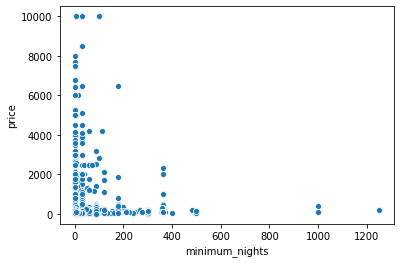

In [58]:
# 1. minimum_nights and Price 
sns.scatterplot(x="minimum_nights",y="price",data=airbnb)

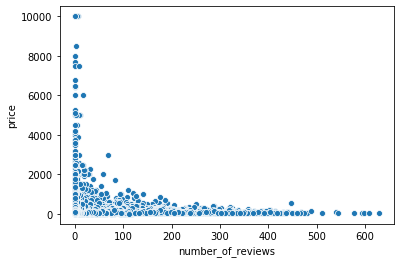

In [63]:
# 2. number_of_reviews and price

sns.scatterplot(x="number_of_reviews",y="price",data=airbnb)

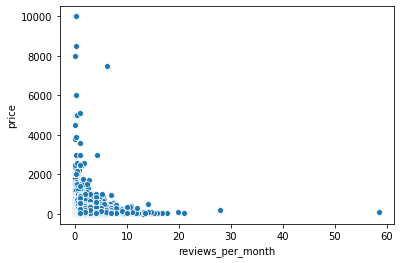

In [66]:
# 3. reviews_per_month and price

sns.scatterplot(x="reviews_per_month",y="price",data=airbnb)

In [77]:
# 4. neighbourhood_group/neighbourhood and price
print ("There are total",len(airbnb.neighbourhood_group.unique()),"neighbourhood group.")
print(airbnb.groupby("neighbourhood_group").price.mean())
print (airbnb.neighbourhood_group.value_counts())
print ("*"*60)
print ("There are total",len(airbnb.neighbourhood.unique()),"neighbourhood.")
print(airbnb.groupby("neighbourhood").price.mean().sort_values(ascending=False))
print (airbnb.neighbourhood.value_counts())


There are total 5 neighbourhood group.
neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64
************************************************************
There are total 221 neighbourhood.
neighbourhood
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
                     ...    
New Dorp           57.000000
Soundview          53.466667
Tremont            51.545455
Hunts Point        50.500000
Bull's Head        47.333333
Name: price, Length: 221, dtype: float64
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
             

In [78]:
# 5. room_type and price
print ("There are total",len(airbnb.room_type.unique()),"room types.")
print(airbnb.groupby("room_type").price.mean())
print (airbnb.room_type.value_counts())

There are total 3 room types.
room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


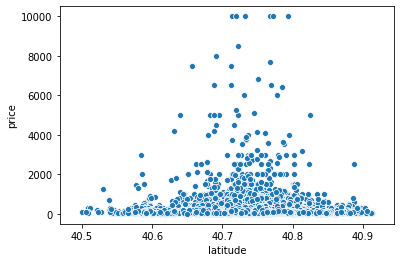

In [92]:
# 6. latitude/longitude and price
sns.scatterplot(x="latitude",y="price",data=airbnb)

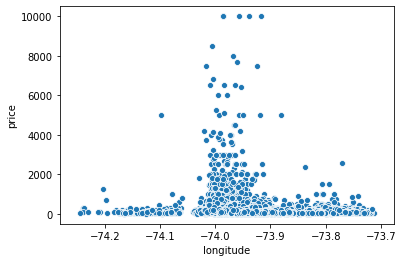

In [93]:
sns.scatterplot(x="longitude",y="price",data=airbnb)



In [85]:
# Build a prediction model for predicting price using the variables of choice with random forest regression 
# (I will not use ID columns, dates, and at this point there is no need to use the name variable;
# additionally I do not want to use categorical variables with too many possible categories). 
# Then, Optimize the parameters and determine the best MSE value I can achieve. What are the 3 most important predictors?

In [4]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Drop ID, name, dates columns and columns with too many categories
airbnb_rfr = airbnb.drop(["id","name","host_id","host_name","last_review","neighbourhood"],axis=1)
airbnb_rfr.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
# Get_dummies and fillna

# get_dummies for airbnb_rfr_neighbourhood_group and room_type.

cat_list = ["neighbourhood_group","room_type"]

for var in cat_list:
    dummies_set = pd.get_dummies(airbnb_rfr[var], drop_first=True, prefix = var)
    airbnb_rfr = pd.concat([airbnb_rfr, dummies_set], axis = 1).drop(var, axis = 1)



# fillna
airbnb_rfr.reviews_per_month=airbnb_rfr.reviews_per_month.fillna(0)


airbnb_rfr.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0


In [9]:
# Select the first 6000 rows.

#  Note: depending on your computer,
# you may encounter computational issues, i.e. the calculations take very long time or you even get an error
# message about the memory of your computer. In that case, I will just use the first 6000 thousand rows of the
# dataset, and perform the steps for that smaller data.


airbnb_rfr=airbnb_rfr.loc[:6000,:]
airbnb_rfr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,40.77126,-73.95483,169,2,3,0.07,1,0,0,1,0,0,0,1
5997,40.70903,-73.93940,100,1,0,0.00,1,0,1,0,0,0,1,0
5998,40.74111,-73.97951,87,30,4,0.09,52,325,0,1,0,0,0,0
5999,40.77431,-73.91140,75,1,4,1.85,1,0,0,0,1,0,1,0


In [124]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor

## Split the data to train and test dataset.

col_list = list(airbnb_rfr.columns)
col_list.remove("price")
X = airbnb_rfr[col_list]
y = airbnb_rfr["price"]


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)


In [125]:
# Build a random forest regression 

airbnb_rfr_rf = RandomForestRegressor(n_estimators = 300, random_state = 0)
airbnb_rfr_rf.fit(X_train, y_train) 

y_pred_d = airbnb_rfr_rf.predict(X_test)

mse_rf = MSE(y_test, y_pred_d)

print('MSE of random forests with default parameters is', mse_rf)


MSE of random forests with default parameters is 30415.288938893515


In [131]:
# Optimize

from sklearn.model_selection import GridSearchCV

airbnb_rfr_rf = RandomForestRegressor(random_state = 0)

# Define the grid

grid = dict(n_estimators=[200,300,400],max_depth = [14,16,18], min_samples_leaf = [8,9,10])

grid_search = GridSearchCV(estimator=airbnb_rfr_rf, param_grid=grid, scoring='neg_mean_squared_error')

grid_result = grid_search.fit(X, y)

print("Best result is obtained using", grid_result.best_params_)

Best result is obtained using {'max_depth': 16, 'min_samples_leaf': 9, 'n_estimators': 300}


In [133]:
# Try the best parameters.

airbnb_rfr_rf = RandomForestRegressor(n_estimators = 300, max_depth = 16, min_samples_leaf = 9, random_state = 0)
                           
# We fit the training set            
airbnb_rf_fit=airbnb_rfr_rf.fit(X_train, y_train)  

# Create predictions
y_pred_f = airbnb_rfr_rf.predict(X_test)

mse_rf = MSE(y_test, y_pred_f)


print('The Best MSE of random forests is', mse_rf)

The Best MSE of random forests is 25883.236954941935


In [140]:
# What are the 3 most important predictors?
pd.Series(data = airbnb_rf_fit.feature_importances_, index= X_train.columns).sort_values(ascending=False)[:3]

longitude                 0.255436
minimum_nights            0.154085
room_type_Private room    0.126097
dtype: float64

In [141]:
# Finally, I want to understand the impact of the review name on the price. First use the text
# analysis that were introduced in the course to identify the 10 most frequent words that appear in
# the listing column. Additionally to the general stopwords, I will consider what other expressions to exclude to get some meaningful results 
# (e.g. you do not want things like ’york’, ’apartment’,
# ’room’, as they just refer to the specific location and context). Then add 10 new columns to the
# original dataset, with each new variable corresponding to one of the 10 identified frequent words, and
# the values of the new columns indicate whether that word appears in the name or not. For example,
# if I identify ’cheap’ as one of the most frequent words, I will need to create a new column, which
# will have value 1 in a row where ’cheap’ appears in the name, and 0 otherwise (hint: use the columns
# ofthe dataframe created using CountVectorizer). Finally, test whether the regression model that I
# created in the previous step can be improved by including these 10 new columns as predictors (e.g.
# do you get a better MSE value)?

In [167]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [142]:
airbnb_rfr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,40.77126,-73.95483,169,2,3,0.07,1,0,0,1,0,0,0,1
5997,40.70903,-73.93940,100,1,0,0.00,1,0,1,0,0,0,1,0
5998,40.74111,-73.97951,87,30,4,0.09,52,325,0,1,0,0,0,0
5999,40.77431,-73.91140,75,1,4,1.85,1,0,0,0,1,0,1,0


In [186]:
airbnb_t=airbnb.loc[:6000,:]
airbnb_t

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,4390865,Upper East Side 1 Bedroom Gem,22688555,Marc,Manhattan,Upper East Side,40.77126,-73.95483,Shared room,169,2,3,2016-07-09,0.07,1,0
5997,4392066,one room bushwick,5605897,Sarah,Brooklyn,Williamsburg,40.70903,-73.93940,Private room,100,1,0,NaN,NaN,1,0
5998,4392351,MURRAY HILL! your home.. BEAUTIFUL,1475015,Mike,Manhattan,Kips Bay,40.74111,-73.97951,Entire home/apt,87,30,4,2018-08-12,0.09,52,325
5999,4392596,Great room in a 2 BD apartment,20820856,Waleed,Queens,Ditmars Steinway,40.77431,-73.91140,Private room,75,1,4,2019-05-26,1.85,1,0


In [187]:
# Transform data.

airbnb_t = airbnb_t.drop(["id","host_id","host_name","last_review","neighbourhood"],axis=1)
airbnb_t.head()

cat_list = ["neighbourhood_group","room_type"]

for var in cat_list:
    dummies_set = pd.get_dummies(airbnb_t[var], drop_first=True, prefix = var)
    airbnb_t = pd.concat([airbnb_t, dummies_set], axis = 1).drop(var, axis = 1)

# fillna
airbnb_t.reviews_per_month=airbnb_t.reviews_per_month.fillna(0)



airbnb_t

,name,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,1,0
1,Skylit Midtown Castle,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,1,0
3,Cozy Entire Floor of Brownstone,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,0,0
4,Entire Apt: Spacious Studio/Loft by central park,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,Upper East Side 1 Bedroom Gem,40.77126,-73.95483,169,2,3,0.07,1,0,0,1,0,0,0,1
5997,one room bushwick,40.70903,-73.93940,100,1,0,0.00,1,0,1,0,0,0,1,0
5998,MURRAY HILL! your home.. BEAUTIFUL,40.74111,-73.97951,87,30,4,0.09,52,325,0,1,0,0,0,0
5999,Great room in a 2 BD apartment,40.77431,-73.91140,75,1,4,1.85,1,0,0,0,1,0,1,0


In [188]:
# Check "name" missing values

airbnb_t.name.isnull().sum()

4

In [189]:
# Fillna 
airbnb_t.name=airbnb_t.name.fillna("")

In [191]:
# text transform

# lowercase
airbnb_t.name = airbnb_t.name.str.lower()

# Create split column
airbnb_t["split"] = airbnb_t["name"].apply(lambda x: x.split())

# lemmatization
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    pos_tag = nltk.pos_tag([word])[0][1][0].upper()
    if pos_tag == 'J':
        return nltk.corpus.wordnet.ADJ
    elif pos_tag == 'N':
        return nltk.corpus.wordnet.NOUN
    elif pos_tag == 'V':
        return nltk.corpus.wordnet.VERB
    elif pos_tag == 'R':
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN
    



l=[]
for n in airbnb_t.split.values:
    l.append([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in n])


airbnb_t["split_1"]=l


airbnb_t['split_final'] = airbnb_t['split_1'].apply(lambda x: ' '.join(x))



airbnb_t.head()

,name,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,split,split_1,split_final
0,clean & quiet apt home by the park,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,1,0,"[clean, &, quiet, apt, home, by, the, park]","[clean, &, quiet, apt, home, by, the, park]",clean & quiet apt home by the park
1,skylit midtown castle,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0,"[skylit, midtown, castle]","[skylit, midtown, castle]",skylit midtown castle
2,the village of harlem....new york !,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,1,0,"[the, village, of, harlem....new, york, !]","[the, village, of, harlem....new, york, !]",the village of harlem....new york !
3,cozy entire floor of brownstone,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,0,0,"[cozy, entire, floor, of, brownstone]","[cozy, entire, floor, of, brownstone]",cozy entire floor of brownstone
4,entire apt: spacious studio/loft by central park,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0,"[entire, apt:, spacious, studio/loft, by, cent...","[entire, apt:, spacious, studio/loft, by, cent...",entire apt: spacious studio/loft by central park


In [192]:
stop_words = list(stopwords.words("english"))

# We can remove stopwords.
vect = CountVectorizer(stop_words = stop_words)

name_counts = vect.fit_transform(airbnb_t['split_final'])

name_counts_df = pd.DataFrame(name_counts.toarray(), columns=vect.get_feature_names())

name_counts_df.head()

,00,000,10,100,1000,1000sq,101,10223,10263,10ft,...,yr,yuge,zen,zoo,别墅二楼主卧房,别墅的地下室,安靜公寓,曼哈顿,森林小丘别墅,皇后区
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
# Most frequent words
word_count = name_counts_df.sum(axis=0).sort_values(ascending = False)
word_count[:20]

room            996
apt             837
bedroom         807
private         743
apartment       627
brooklyn        494
studio          483
sunny           456
park            442
cozy            436
loft            421
spacious        410
village         408
east            408
williamsburg    388
nyc             344
manhattan       341
beautiful       327
large           297
garden          234
dtype: int64

In [196]:
# 10 most frequent words that appear in the listing column
stop_words = stop_words+["room","apt","apartment"]

# We can remove stopwords.
vect = CountVectorizer(stop_words = stop_words)

name_counts = vect.fit_transform(airbnb_t['split_final'])

name_counts_df = pd.DataFrame(name_counts.toarray(), columns=vect.get_feature_names())

word_count = name_counts_df.sum(axis=0).sort_values(ascending = False)
word_count[:10]

bedroom     807
private     743
brooklyn    494
studio      483
sunny       456
park        442
cozy        436
loft        421
spacious    410
east        408
dtype: int64

In [ ]:
# Then add 10 new columns to the original dataset(airbnb_t)

In [195]:
airbnb_t.head()

,name,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,split,split_1,split_final
0,clean & quiet apt home by the park,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,1,0,"[clean, &, quiet, apt, home, by, the, park]","[clean, &, quiet, apt, home, by, the, park]",clean & quiet apt home by the park
1,skylit midtown castle,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0,"[skylit, midtown, castle]","[skylit, midtown, castle]",skylit midtown castle
2,the village of harlem....new york !,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,1,0,"[the, village, of, harlem....new, york, !]","[the, village, of, harlem....new, york, !]",the village of harlem....new york !
3,cozy entire floor of brownstone,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,0,0,"[cozy, entire, floor, of, brownstone]","[cozy, entire, floor, of, brownstone]",cozy entire floor of brownstone
4,entire apt: spacious studio/loft by central park,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0,"[entire, apt:, spacious, studio/loft, by, cent...","[entire, apt:, spacious, studio/loft, by, cent...",entire apt: spacious studio/loft by central park


In [215]:
airbnb_t=pd.concat([airbnb_t,name_counts_df.loc[:,list(word_count[:10].index)]],axis=1)

In [216]:
airbnb_t.head()

,name,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,...,bedroom,private,brooklyn,studio,sunny,park,cozy,loft,spacious,east
0,clean & quiet apt home by the park,40.64749,-73.97237,149,1,9,0.21,6,365,1,...,0,0,0,0,0,1,0,0,0,0
1,skylit midtown castle,40.75362,-73.98377,225,1,45,0.38,2,355,0,...,0,0,0,0,0,0,0,0,0,0
2,the village of harlem....new york !,40.80902,-73.94190,150,3,0,0.00,1,365,0,...,0,0,0,0,0,0,0,0,0,0
3,cozy entire floor of brownstone,40.68514,-73.95976,89,1,270,4.64,1,194,1,...,0,0,0,0,0,0,1,0,0,0
4,entire apt: spacious studio/loft by central park,40.79851,-73.94399,80,10,9,0.10,1,0,0,...,0,0,0,1,0,1,0,1,1,0


In [217]:
airbnb_f = airbnb_t.drop(["name","split","split_1","split_final"],axis=1)
airbnb_f.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,bedroom,private,brooklyn,studio,sunny,park,cozy,loft,spacious,east
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,...,0,0,0,0,0,1,0,0,0,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,...,0,0,0,0,0,0,0,0,0,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,...,0,0,0,0,0,0,1,0,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,...,0,0,0,1,0,1,0,1,1,0


In [218]:

col_list = list(airbnb_f.columns)
col_list.remove("price")
X = airbnb_f[col_list]
y = airbnb_f["price"]


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)


airbnb_f_rf = RandomForestRegressor(n_estimators = 300, random_state = 0)
airbnb_f_rf.fit(X_train, y_train) 

y_pred_d = airbnb_f_rf.predict(X_test)

mse_rf = MSE(y_test, y_pred_d)

print('MSE of random forests with default parameters is', mse_rf)

# It is not as good as the previous model without the 10 new columns.



MSE of random forests with default parameters is 36344.77745605514


In [220]:
# Try to optimize it. 
airbnb_f_rf = RandomForestRegressor(random_state = 0)

# Define the grid

grid = dict(n_estimators=[200,300,400],max_depth = [12,14,16], min_samples_leaf = [8,9,10])

grid_search = GridSearchCV(estimator=airbnb_f_rf, param_grid=grid, scoring='neg_mean_squared_error')

grid_result = grid_search.fit(X, y)

print("Best result is obtained using", grid_result.best_params_)

Best result is obtained using {'max_depth': 14, 'min_samples_leaf': 9, 'n_estimators': 300}


In [221]:
airbnb_f_rf = RandomForestRegressor(n_estimators = 300, max_depth = 14, min_samples_leaf = 9, random_state = 0)
                           
# We fit the training set            
airbnb_rf_fit=airbnb_f_rf.fit(X_train, y_train)  

# Create predictions
y_pred_f = airbnb_rf_fit.predict(X_test)

mse_rf = MSE(y_test, y_pred_f)


print('The Best MSE of random forests is', mse_rf)

The Best MSE of random forests is 25235.88795943267


In [222]:
# In the previous step: The Best MSE of random forests is 25883.236954941935
# Now using 10 columns of 10 identified most frequent words model, The Best MSE of random forests is 25235.88795943267

# so regression model in the previous step can be improved by including these 10 new columns as predictors. 